# KIDNEY STONE PREDICTION BASED ON URINE ANALYSIS



## This model is used to predict whether the physical characteristics of urine which are
- Specific Gravity, the density of the urine relative to water(Gravity)
- The negative logarithm of th hydrogne ion (pH)
- Osmolarity; proportional to the concentration of molecules in solution (osmo)
- Conductivity; proportional to the concentration of charged ions in solution (cond)
- Urea Concentration (urea)
- Calcium concentration (calc)

## are related to the formulation of Calcium Oxalate Crystals.

In [139]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [124]:
train_data.describe()
train_data.head(10)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
5,5,1.025,6.90,947,28.4,395,2.64,1
6,6,1.008,5.09,371,15.5,159,2.17,1
7,7,1.015,5.53,450,8.1,170,1.16,0
8,8,1.025,7.38,736,25.3,418,1.52,0
9,9,1.017,6.61,527,20.0,75,4.49,1


In [64]:
test_data.describe()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [125]:
train_data.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

# PLOTTING THE GRAPHS

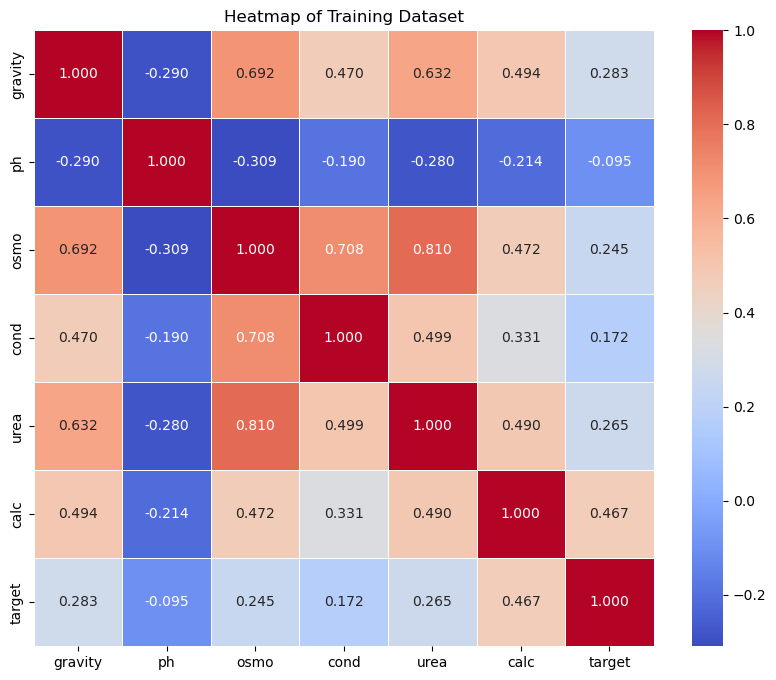

In [126]:
train_data_plot = train_data.drop(columns = ['id'])
plt.figure(figsize=(10,8))
sns.heatmap(train_data_plot.corr(), annot = True, cmap = 'coolwarm', fmt ='.3f', linewidths = 0.5)
plt.title('Heatmap of Training Dataset')
plt.show()




In [146]:
X = train_data.drop(columns = ['id', 'target'])
y = train_data['target']


## TRAINING THE MODEL

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42, shuffle=True)
X_train.head() 

,gravity,ph,osmo,cond,urea,calc
192,1.012,5.77,461,17.4,195,1.40
234,1.017,5.71,704,24.5,270,3.46
5,1.025,6.90,947,28.4,395,2.64
45,1.008,5.98,779,17.8,418,6.99
245,1.031,5.24,703,23.6,364,12.68


# Fitting the model using
- ## DecisionTreeClassifier
- ## RandomForestClassifier
- ## GradientBoostingClassifier

In [62]:
train_test_split??

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Source:   
def train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
):
    """Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test s

In [117]:
kidney_model1 = DecisionTreeClassifier(random_state= 1)
kidney_model2 = RandomForestClassifier()
kidney_model3 = GradientBoostingClassifier()

kidney_model1.fit(X_train,y_train)
kidney_model2.fit(X_train,y_train)
kidney_model3.fit(X_train,y_train)

GradientBoostingClassifier()

# PREDICTING THE MODEL

In [118]:
kidney_predict1 = kidney_model1.predict_proba(X_test)[:,1]
kidney_predict2 = kidney_model2.predict_proba(X_test)[:,1]
kidney_predict3 = kidney_model3.predict_proba(X_test)[:,1]


In [179]:
average_predictions = (kidney_predict1 + kidney_predict2 + kidney_predict3)/3
print(average_predictions.shape)
auc_score = roc_auc_score(y_test, average_predictions)
auc_score


(83,)


0.8

# FITTING THE MODEL ON THE NEW TEST FILE

In [86]:
new_test_data = test_data.drop(columns = ['id'])
new_test_data.head()


,gravity,ph,osmo,cond,urea,calc
0,1.017,5.24,345,11.5,152,1.16
1,1.020,5.68,874,29.0,385,3.46
2,1.024,5.36,698,19.5,354,13.00
3,1.020,5.33,668,25.3,252,3.46
4,1.011,5.87,567,29.0,457,2.36


In [176]:
test_prediction1 = kidney_model1.predict_proba(new_test_data)[:, 1]
test_prediction2 = kidney_model2.predict_proba(new_test_data)[:, 1]
test_prediction3 = kidney_model3.predict_proba(new_test_data)[:, 1]

In [178]:
average_test_prediction = (test_prediction1+test_prediction2 + test_prediction3)/3
print(average_test_prediction.shape)
average_test_prediction_data = pd.DataFrame({
    'id' : test_data['id'],
    'target' : average_test_prediction
    
    
    
})

average_test_prediction_data.head()




(276,)


,id,target
0,414,0.435969
1,415,0.751301
2,416,0.890462
3,417,0.675789
4,418,0.308252


# FIITING THE MODEL USING
- ## GradientBoostingClassifier
- ## SupportVectorClassifer
- ## RandomForestClassifier

In [89]:
kidney_model1 = GradientBoostingClassifier()
kidney_model2 = SVC(probability = True)
kidney_model3 = RandomForestClassifier()

# Fitting the Model

In [90]:
kidney_model1.fit(X_train, y_train)
kidney_model2.fit(X_train, y_train)
kidney_model3.fit(X_train, y_train)

RandomForestClassifier()

# Making Predictions

In [167]:
kidney_predict1 = kidney_model1.predict_proba(X_test)[:, 1]
kidney_predict2 = kidney_model2.predict_proba(X_test)[:, 1]
kidney_predict3 = kidney_model3.predict_proba(X_test)[:, 1]

average_prediction = (kidney_predict1 + kidney_predict2 + kidney_predict3)/3



# Checking Accuracy Using Roc_Auc Score

In [169]:
y_test.shape

(83,)

In [168]:
average_prediction.shape

(83,)

In [92]:
auc_score = roc_auc_score(y_test, average_prediction)
auc_score

0.8526315789473684

# Making Predictions on New Data Set

In [165]:
new_kidney_predict1 = kidney_model1.predict_proba(new_test_data)[:, 1]
new_kidney_predict2 = kidney_model2.predict_proba(new_test_data)[:, 1]
new_kidney_predict3 = kidney_model3.predict_proba(new_test_data)[:, 1]

average_new_kidney_predict = (new_kidney_predict1 + new_kidney_predict2 + new_kidney_predict3)/3
average_new_kidney_predict_data = pd.DataFrame({

    'id': test_data['id'],
    'target': average_new_kidney_predict

})

average_new_kidney_predict_data.head()

,id,target
0,414,0.435969
1,415,0.751301
2,416,0.890462
3,417,0.675789
4,418,0.308252
